<!-- Notebook Header Start -->

<h1 align="center">Spike Sorting</h1>

<p align="center">
  <strong>Author:</strong> Karl Bates<br>
  <strong>Date:</strong> 2024-11-18<br>
  <strong>Affiliation:</strong> Carnegie Mellon University, Cohen-Karni Lab  || Neuromechatronics Lab
</p>

---

## 📜 Project Overview

(to populate) 

- **Objective:** (to populate)
- **Scope:** (to populate)

---

## 📊 Notebook Outline

1. **Data Import & Preprocessing**


---

## 📚 References & Additional Resources

- [Kilosort4 docs](https://github.com/MouseLand/Kilosort/tree/main)
- [SpikeInterface docs](https://github.com/SpikeInterface)

---

<!-- Notebook Header End -->


# 📈 Importing Libraries & Data
---

### imports

In [1]:
# standard imports
from pathlib import Path
import os
import pandas as pd
import numpy as np
from kilosort import io
import matplotlib.pyplot as plt

# custom imports
from automations import RM1
from automations import kilosort_wrapper

### probe definition

Using the spreadsheet, `Adapter_pinout.xlsx`, the contact ID's can be traced to the "device channel", and we can assign them on the probe. 

In this case, our channel indices correspond to the aux inputs to the intan headstage.

refer to the notebook, `RM1_pipeline.ipynb` within  the `dev_notebook` folder

In [2]:
# Path definitions
SAVE_DIRECTORY = Path(fr'D:\Data\CMU.80 Data\88 Analyzed Data\88.002 Multi rat kilosort export')  # NOTE Specify the path where the data will be copied to, and where Kilosort4 results will be saved.
DATA_DIRECTORY = Path(fr'D:\Data\CMU.80 Data\82 External Data\82.002 Sample Rat Data from RM1 Project')  # NOTE Specify the path where the data will be copied to, and where Kilosort4 results will be saved.
# Create path if it doesn't exist
DATA_DIRECTORY.mkdir(parents=True, exist_ok=True)
SAVE_DIRECTORY.mkdir(parents=True, exist_ok=True)
PROBE_DIRECTORY = Path(r'D:\Data\CMU.80 Data\88 Analyzed Data\88.001 A1x32-Edge-5mm-20-177-A32\A1x32-Edge-5mm-20-177-A32.prb')

# 🔁 Example: Review of Every Trial in a Rat of Choice

This is used to determine which trial is most likely to produce good units in a spike sorting analysis

### filepath definitions

In [3]:
channel_mapping = pd.read_excel(r"D:\Data\CMU.80 Data\88 Analyzed Data\88.001 A1x32-Edge-5mm-20-177-A32\Adapter_pinout.xlsx",
                                sheet_name="summary",
                                header=2).iloc[:,[8,10,12,14]]
channel_mapping.head(5)

,A1x32 Probe.1,A32->O32 Adapter.1,Intan Board,Intan Input.1
0,32,32,T13,19
1,31,30,T14,20
2,30,31,B13,28
3,29,28,T15,21
4,28,29,B14,27


### importing the rat

In [4]:
DW323 = RM1.Rat(DATA_DIRECTORY, PROBE_DIRECTORY, "DW323")

KeyboardInterrupt: 

In [ ]:
# for example, pulling the amp data from the 7th DRGS trial (only works for DW333)
# DW322.mat_files_dict["VF_DRG__145435"]["AM"]["amp"][0, 0][0, 0]

In [ ]:
DW323.qst_experiment_notes

In [ ]:
DW323.drgs_trial_notes.head()

In [ ]:
DW323.get_sc_data()
DW323.sc_data

### process data for import into Kilosort

I will use a combination of `SpikeInterface` & `Kilosort.io.extractors` to get the data I need

In [ ]:
analysis = kilosort_wrapper(DW323, SAVE_DIRECTORY)

In [ ]:
# analysis.save_spinalcord_data_to_binary(TRIAL_NAMES=["VF_DRG_1_241115_145435",
#                                                      "VF_DRG_1_241115_145435",
#                                                      "VF_DRG_1_241115_145739",
#                                                      "VF_DRG_4_241115_153512",
#                                                      "VF_DRG_4_241115_170440",
#                                                      ])
analysis.save_spinalcord_data_to_binary()
analysis.run_spinalcord_kilosort()

# 🐁 Analysis DRG Stimulation Trial on Rat DW323
---

### defining filepaths

In [5]:
SAVE_DIRECTORY = Path(fr'D:\Data\CMU.80 Data\88 Analyzed Data\88.003 Initial Analysis, DW323')  # NOTE Specify the path where the data will be copied to, and where Kilosort4 results will be saved.
DATA_DIRECTORY = Path(fr'D:\Data\CMU.80 Data\82 External Data\82.002 Sample Rat Data from RM1 Project')  # NOTE Specify the path where the data will be copied to, and where Kilosort4 results will be saved.
# Create path if it doesn't exist
DATA_DIRECTORY.mkdir(parents=True, exist_ok=True)
SAVE_DIRECTORY.mkdir(parents=True, exist_ok=True)

In [6]:
DW323 = RM1.Rat(DATA_DIRECTORY, PROBE_DIRECTORY, "DW323")
DW323.get_sc_data()

Reading DRGS_10_240911_155921...
Error reading stream 2 for DRGS_10_240911_155921. continuing...
Reading DRGS_11_240911_160638...
Error reading stream 2 for DRGS_11_240911_160638. continuing...
Reading DRGS_1_240911_144910...
Error reading stream 2 for DRGS_1_240911_144910. continuing...
Reading DRGS_2_240911_145808...
Error reading stream 2 for DRGS_2_240911_145808. continuing...
Reading DRGS_3_240911_150506...
Error reading stream 2 for DRGS_3_240911_150506. continuing...
Reading DRGS_4_240911_151137...
Error reading stream 2 for DRGS_4_240911_151137. continuing...
Reading DRGS_5_240911_151925...
Error reading stream 2 for DRGS_5_240911_151925. continuing...
Reading DRGS_6_240911_152522...
Error reading stream 2 for DRGS_6_240911_152522. continuing...
Reading DRGS_7_240911_153255...
Error reading stream 2 for DRGS_7_240911_153255. continuing...
Reading DRGS_8_240911_154319...
Error reading stream 2 for DRGS_8_240911_154319. continuing...
Reading DRGS_9_240911_155057...
Error reading 

## 🔬 Exploratory Data Analysis (EDA)


see paper for more information. for this experiment, I elected to start my analysis with trial: 

**Rat: DW322 | Trial: DRGS_1_240918_125448**

In [7]:
DW323.sc_data.keys()

dict_keys(['DRGS_10_240911_155921', 'DRGS_11_240911_160638', 'DRGS_1_240911_144910', 'DRGS_2_240911_145808', 'DRGS_3_240911_150506', 'DRGS_4_240911_151137', 'DRGS_5_240911_151925', 'DRGS_6_240911_152522', 'DRGS_7_240911_153255', 'DRGS_8_240911_154319', 'DRGS_9_240911_155057', 'nninsertion_240911_130746', 'nn_seond_insertion_240911_144433', 'QST_2_240911_181341', 'VF_1_240911_164342', 'VF_2_240911_165039', 'VF_3_240911_165617', 'VF_4_240911_170446', 'VF_5_240911_171014', 'VF_6_240911_171505', 'VF_7_240911_180931'])

In [8]:
TRIAL_DRGS = "DRGS_11_240911_160638"
TRIAL_VF = ""

## 📑 metadata - DRGS

In [9]:
DW323.drgs_experiment_notes

'ALSO have nn in sc'

In [10]:
DW323.drgs_trial_notes.loc[11].to_latex(r"D:\Data\CMU.80 Data\88 Analyzed Data\88.003 Initial Analysis, DW323\tables\drgs_trial_notes.tex",
                                        header=False,
                                        )
DW323.drgs_trial_notes.loc[11]

5
Trial Number        11
Condition         DRGS
amp (uA)            70
PW (us)            300
Freq. (Hz)          20
Dur. (s)           180
Stimuli            NaN
Stage              NaN
Stimuli Dur.       NaN
rcrtrange        69,77
waitime             60
Name: 11, dtype: object

## 📑 metadata - DRGS

In [11]:
DW323.qst_experiment_notes

'd1 tl, d2 am sync, a1 am monitor,a2 evf'

In [12]:
DW323.qst_trial_notes

5,Trial Number,Condition,amp,PW (us),Freq. (Hz),drgDur. (s),Stimuli,temp,Stimuli Dur.,NaN,NaN
Trial Number,,,,,,,,,,,
1,1,VF,70,300,5,180,vf,NaN,30,pos 1,pad just prximal from toe
2,2,VF,70,300,20,180,vf,NaN,30,pos 1,NaN
3,3,VF,70,300,100,180,vf,NaN,30,pos 1,NaN
4,4,VF,70,300,100,180,vf,NaN,30,pos 2,toes
5,5,VF,70,300,5,180,vf,NaN,30,pos 2,NaN
6,6,VF,70,300,20,180,vf,NaN,30,pos 2,NaN
1,1,QST,70,300,100,180,QST,52,5s at 60,NaN,NaN
2,2,QST,70,300,5,180,QST,52,5s at 60,NaN,NaN
3,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 📈 signals

In [13]:
DW323.intan_recordings_stream0[TRIAL_DRGS]

IntanRecordingExtractor: 34 channels - 30.0kHz - 1 segments - 8,745,728 samples 
                         291.52s (4.86 minutes) - uint16 dtype - 567.16 MiB
  file_path: D:\Data\CMU.80 Data\82 External Data\82.002 Sample Rat Data from RM1 Project\DW323\DW323\DRGS_11_240911_160638\DRGS_11_240911_160638.rhd

In [14]:
DW323.intan_recordings_stream1[TRIAL_DRGS]

IntanRecordingExtractor: 6 channels - 7500.0Hz - 1 segments - 2,186,432 samples 
                         291.52s (4.86 minutes) - uint16 dtype - 25.02 MiB
  file_path: D:\Data\CMU.80 Data\82 External Data\82.002 Sample Rat Data from RM1 Project\DW323\DW323\DRGS_11_240911_160638\DRGS_11_240911_160638.rhd

In [15]:
DW323.intan_recordings_stream3[TRIAL_DRGS]

IntanRecordingExtractor: 2 channels - 30.0kHz - 1 segments - 8,745,728 samples 
                         291.52s (4.86 minutes) - uint16 dtype - 33.36 MiB
  file_path: D:\Data\CMU.80 Data\82 External Data\82.002 Sample Rat Data from RM1 Project\DW323\DW323\DRGS_11_240911_160638\DRGS_11_240911_160638.rhd

In [16]:
DW323.intan_recordings_stream4[TRIAL_DRGS]


IntanRecordingExtractor: 2 channels - 30.0kHz - 1 segments - 8,745,728 samples 
                         291.52s (4.86 minutes) - uint16 dtype - 33.36 MiB
  file_path: D:\Data\CMU.80 Data\82 External Data\82.002 Sample Rat Data from RM1 Project\DW323\DW323\DRGS_11_240911_160638\DRGS_11_240911_160638.rhd

In [17]:
DW323.sc_data[TRIAL_DRGS]

ChannelSliceRecording: 32 channels - 30.0kHz - 1 segments - 8,745,728 samples 
                       291.52s (4.86 minutes) - uint16 dtype - 533.80 MiB

In [18]:
recording = DW323.sc_data[TRIAL_DRGS]

In [19]:
# Get all channel IDs
channel_ids = recording.get_channel_ids()

# Find the index of channel 'A-000'
try:
    channel_idx = list(channel_ids).index('A-000')
except ValueError:
    raise ValueError("Channel 'A-000' not found in the recording.")

channel_ids

array(['A-000', 'A-001', 'A-002', 'A-003', 'A-004', 'A-005', 'A-006',
       'A-007', 'A-008', 'A-009', 'A-010', 'A-011', 'A-012', 'A-013',
       'A-014', 'A-015', 'A-016', 'A-017', 'A-018', 'A-019', 'A-020',
       'A-021', 'A-022', 'A-023', 'A-024', 'A-025', 'A-026', 'A-027',
       'A-028', 'A-029', 'A-030', 'A-031'], dtype='<U64')

In [20]:
# Retrieve gain and offset arrays for all channels
gain_to_uV_array = recording.get_property('gain_to_uV')
offset_to_uV_array = recording.get_property('offset_to_uV')

# Get gain and offset for 'A-000' using the channel index
gain_to_uV = gain_to_uV_array[channel_idx]
offset_to_uV = offset_to_uV_array[channel_idx]
print(gain_to_uV, offset_to_uV)

0.195 -6389.76


In [21]:
# Retrieve the trace for channel 'A-000'
trace = recording.get_traces(channel_ids=['A-000'])  # to get only one datapoint, append with [0]


In [22]:
# Convert raw data to voltage
voltage = trace * gain_to_uV + offset_to_uV
voltage

array([[ 69.03 ],
       [ 49.14 ],
       [ 54.21 ],
       ...,
       [-52.26 ],
       [-52.065],
       [-52.26 ]])

In [23]:
# Get sampling frequency
sampling_rate = recording.get_sampling_frequency()

# Calculate time axis
n_samples = len(voltage)
time = np.arange(n_samples) / sampling_rate  # Time in seconds


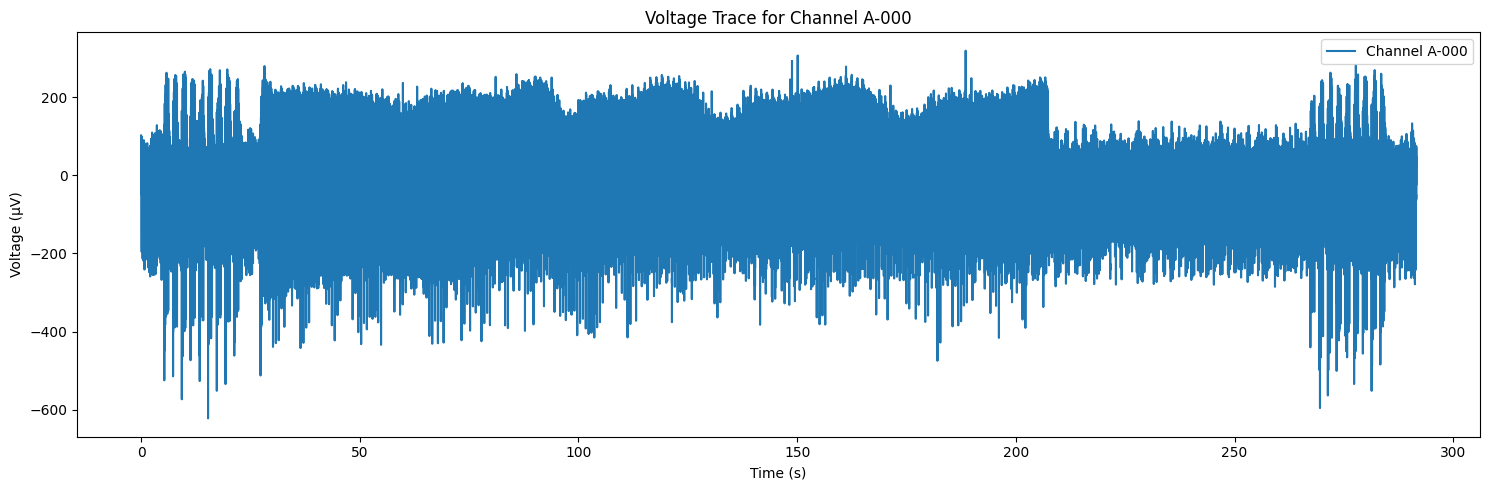

In [24]:
plt.figure(figsize=(15, 5))
plt.plot(time, voltage, label='Channel A-000')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (µV)')
plt.title('Voltage Trace for Channel A-000')
plt.legend()
plt.tight_layout()
plt.show()


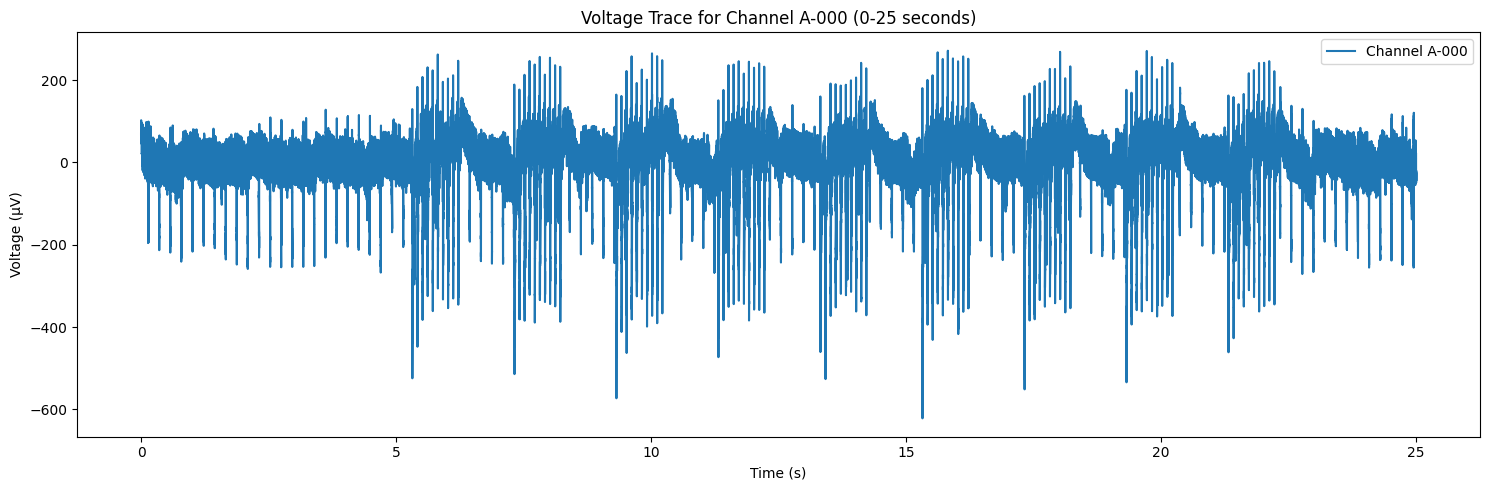

In [25]:
# plotting pre-drg stim window
start_time = 0
end_time = 25
start_idx = int(start_time * sampling_rate)
end_idx = int(end_time * sampling_rate)

time_window = time[start_idx:end_idx]
voltage_window = voltage[start_idx:end_idx]

plt.figure(figsize=(15, 5))
plt.plot(time_window, voltage_window, label='Channel A-000')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (µV)')
plt.title(f'Voltage Trace for Channel A-000 ({start_time}-{end_time} seconds)')
plt.legend()
plt.tight_layout()
plt.show()

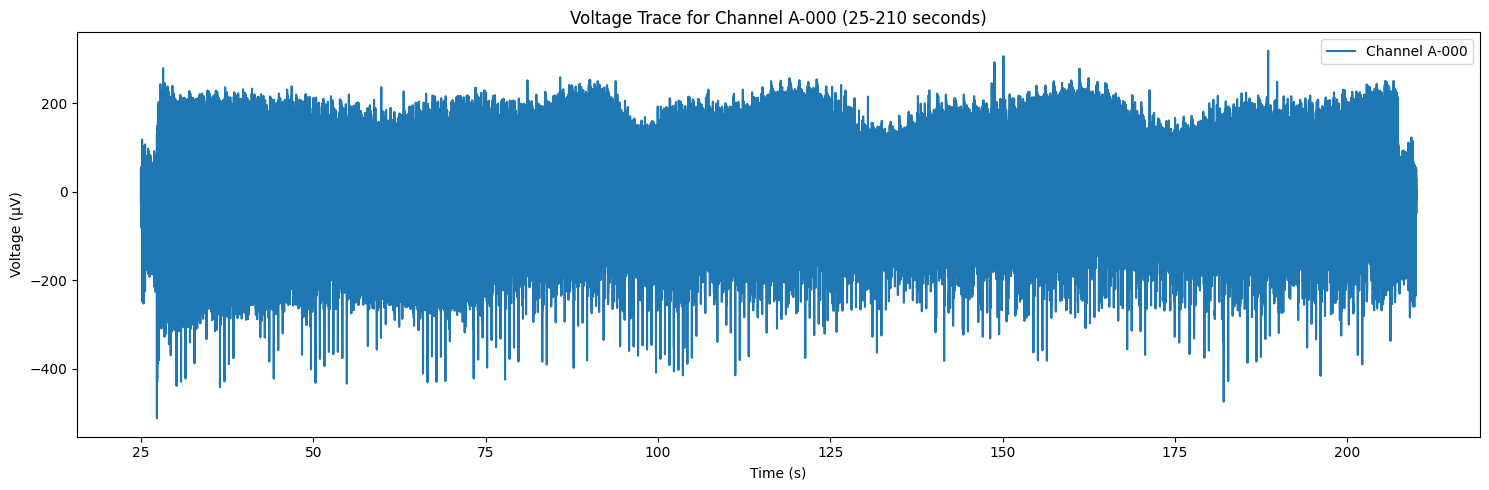

In [26]:
# plotting drg stim window
start_time = 25
end_time = 210
start_idx = int(start_time * sampling_rate)
end_idx = int(end_time * sampling_rate)

time_window = time[start_idx:end_idx]
voltage_window = voltage[start_idx:end_idx]

plt.figure(figsize=(15, 5))
plt.plot(time_window, voltage_window, label='Channel A-000')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (µV)')
plt.title(f'Voltage Trace for Channel A-000 ({start_time}-{end_time} seconds)')
plt.legend()
plt.tight_layout()
plt.show()

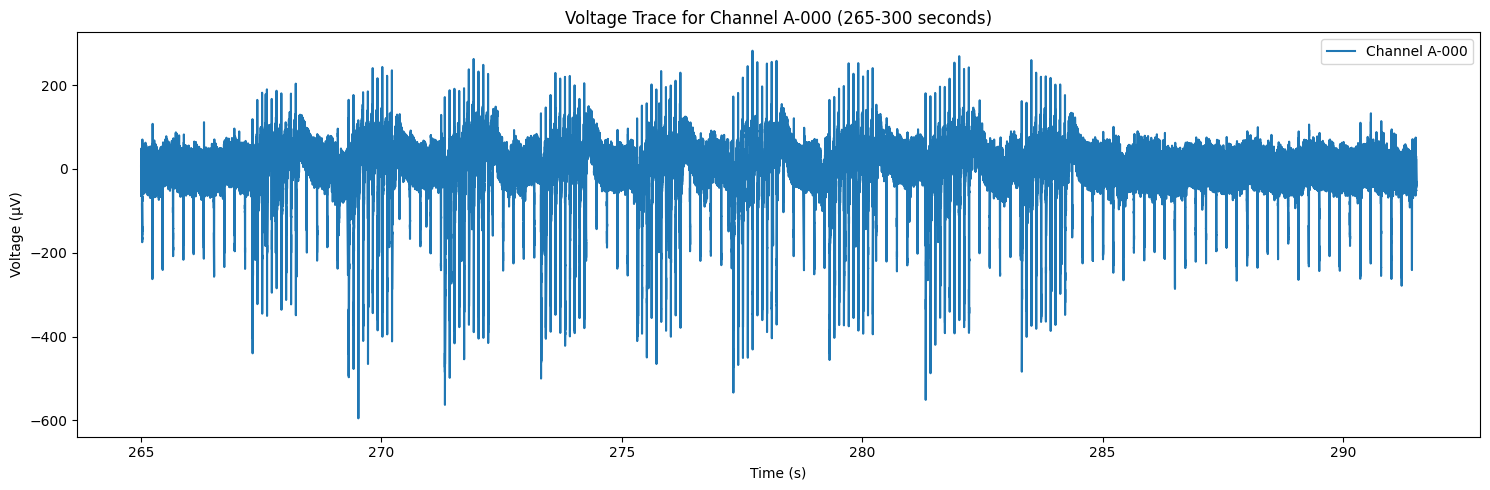

In [27]:
# plotting post-drg stim window
start_time = 265
end_time = 300
start_idx = int(start_time * sampling_rate)
end_idx = int(end_time * sampling_rate)

time_window = time[start_idx:end_idx]
voltage_window = voltage[start_idx:end_idx]

plt.figure(figsize=(15, 5))
plt.plot(time_window, voltage_window, label='Channel A-000')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (µV)')
plt.title(f'Voltage Trace for Channel A-000 ({start_time}-{end_time} seconds)')
plt.legend()
plt.tight_layout()
plt.show()

### analysis
---

### Identify Stimulation Times from Digital Channels

Digital 1 - seems to be a start and end time to the experiment

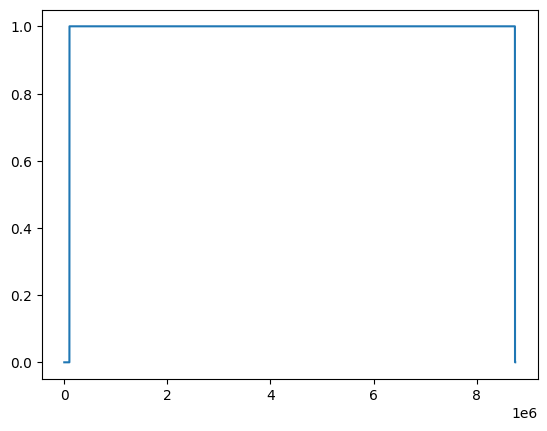

In [28]:
# Extract the digital channel trace
digital_trace = DW323.intan_recordings_stream4[TRIAL_DRGS].get_traces(channel_ids=['DIGITAL-IN-01'])
plt.plot(digital_trace)

Digital Input 2 - Entire Trace

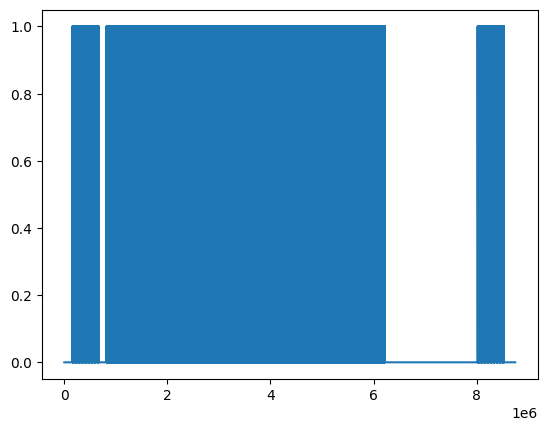

In [29]:
# Extract the digital channel trace
digital_trace = DW323.intan_recordings_stream4[TRIAL_DRGS].get_traces(channel_ids=['DIGITAL-IN-02'])
plt.plot(digital_trace)

Digital Input 2 - Pre-Stim Pulses

each of these (9) stimulations has (10) pulse widths.

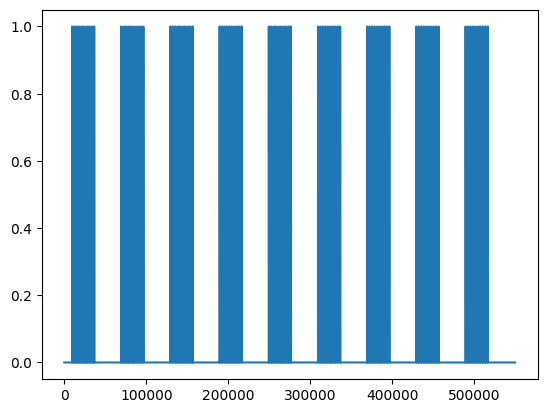

In [30]:
plt.plot(digital_trace[150000:700000])

Digital Input 2 - Spacing Between Stimulation

There are about 60,000 samples in the digital trace. that corresponds to each stimulation occuring every (2) seconds. (60,000 samples / 30,000 samples/sec = 2 seconds)

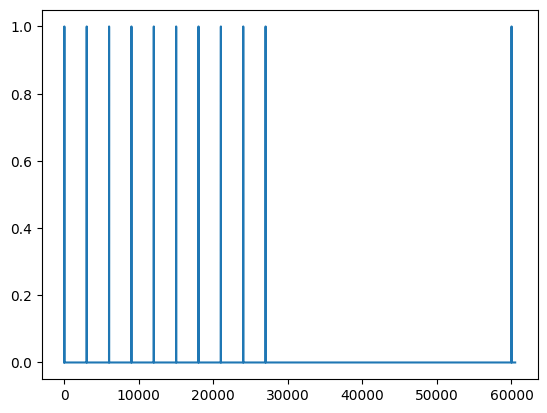

In [31]:
plt.plot(digital_trace[159500:220000])

Digital Input 2 - Intra-Stim Pulses

there are (10) individual pulses across every 27,000 datapoints. 
27,000 / 9 = 3,000 samples between pulses.
3,000 samples / 30,000 samples / sec = 0.1 seconds 

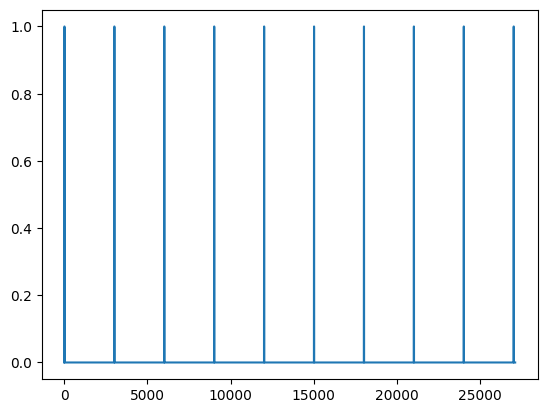

In [32]:
plt.plot(digital_trace[159500:186600])

Digital Input 2 - Individual Pulse Width

Stimulation was occuring for (9) datapoints. Sampling frequency = 30kHz.  9 / 30E3 = 0.003 seconds = 300microseconds. This matches our expected pulse width.

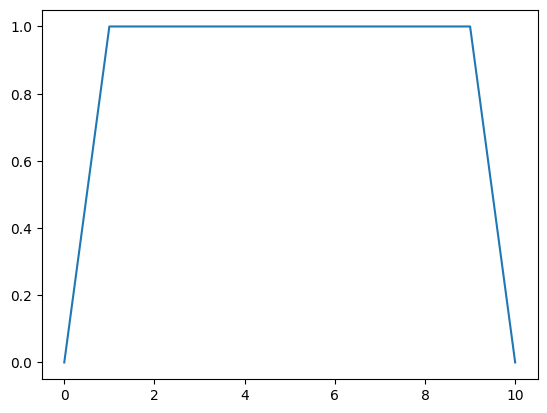

In [33]:
plt.plot(digital_trace[162504:162515])

### Extract Stimulation Times:

In [34]:
# The digital trace is typically high (1) during a pulse and low (0) otherwise
# We'll find the rising edges where the pulse starts

# Threshold the digital trace to find rising edges
threshold = 0.5  # Adjust based on your data
digital_trace_binary = (digital_trace.astype(int) > threshold).astype(int).flatten()

# Find indices where the digital trace goes from low to high (rising edge)
rising_edges = np.where((digital_trace_binary[:-1] == 0) & (digital_trace_binary[1:] == 1))[0]

# Convert indices to times
sampling_rate = recording.get_sampling_frequency()
stimulation_times = rising_edges / sampling_rate  # Times in seconds

# Inspect the first 50 stimulation times
stimulation_times[:100]

array([ 5.3168    ,  5.4168    ,  5.5168    ,  5.6168    ,  5.7168    ,
        5.8168    ,  5.9168    ,  6.0168    ,  6.1168    ,  6.2168    ,
        7.31683333,  7.41683333,  7.51683333,  7.61683333,  7.71683333,
        7.81683333,  7.91683333,  8.01683333,  8.11683333,  8.21683333,
        9.31683333,  9.41683333,  9.51683333,  9.61683333,  9.71683333,
        9.81683333,  9.91683333, 10.01683333, 10.11683333, 10.21683333,
       11.31683333, 11.41683333, 11.51683333, 11.61683333, 11.71683333,
       11.81683333, 11.91683333, 12.01683333, 12.11683333, 12.21683333,
       13.31683333, 13.41683333, 13.51683333, 13.61683333, 13.71683333,
       13.81683333, 13.91683333, 14.01683333, 14.11683333, 14.21683333,
       15.31683333, 15.41683333, 15.51683333, 15.61683333, 15.71683333,
       15.81683333, 15.91683333, 16.01683333, 16.11683333, 16.21683333,
       17.31683333, 17.41683333, 17.51683333, 17.61683333, 17.71683333,
       17.81683333, 17.91683333, 18.01683333, 18.11683333, 18.21

In [35]:
digital_trace.flatten()[159504:159515]

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0], dtype=uint16)

In [36]:
rising_edges

array([ 159504,  162504,  165504, ..., 8520527, 8523527, 8526527],
      dtype=int64)

### Perform Spike-Triggered Averaging (STA)

Define the Time Window for STA:

In [51]:
# Define the time window around each stimulation pulse
pre_time = -0.001  # setting it to negative so that I can delay the window 1 ms before the pulse
post_time = 0.005  # 5 ms after the pulse
window_samples = int((pre_time + post_time) * sampling_rate)
window_samples

120

In [52]:
# # Parameters for the delayed window
# delay_time = 0.002  # Delay of 2 ms after the rising edge
# window_duration = 0.005  # Window length of 5 ms
# delay_samples = int(delay_time * sampling_rate)  # Convert delay time to samples
# window_samples = int(window_duration * sampling_rate)  # Convert window duration to samples
# window_samples


Extract Windows and Compute the Average:

In [53]:
# Choose the channel(s) to analyze (e.g., all channels or a specific one)
# For this example, we'll use all channels except the digital channel
channels_to_analyze = ["A-000"] # to analyze them all: [ch for ch in channel_ids]

# Initialize an array to hold the extracted windows
num_stims = len(stimulation_times)
num_channels = len(channels_to_analyze)
windows = np.zeros((num_stims, num_channels, window_samples))

# Loop over each stimulation time and extract the window
for i, stim_time in enumerate(stimulation_times):
    # Convert time to sample index
    stim_sample = int(stim_time * sampling_rate)
    # Define window indices
    start_sample = stim_sample - int(pre_time * sampling_rate)
    end_sample = stim_sample + int(post_time * sampling_rate)
    # Handle boundary conditions
    if start_sample < 0 or end_sample > recording.get_num_frames():
        continue  # Skip if window is out of bounds
    # Extract the window for all channels
    window = recording.get_traces(
        channel_ids=channels_to_analyze,
        start_frame=start_sample,
        end_frame=end_sample
    )
    windows[i] = window.T  # Transpose to match dimensions


Compute the Average ECAP:

In [54]:
# Compute the average across all stimulation windows
average_ecap = np.mean(windows, axis=0)  # Shape: (num_channels, window_samples)
average_ecap

array([[32514.5952381 , 32442.56772487, 32439.92301587, 32506.83042328,
        32635.08068783, 32768.22328042, 32869.87962963, 32909.26058201,
        32894.96957672, 32869.10449735, 32858.46666667, 32852.7994709 ,
        32816.43121693, 32760.30873016, 32734.90925926, 32758.04365079,
        32794.32698413, 32839.18783069, 32908.8010582 , 32968.20793651,
        32994.36534392, 32979.52619048, 32923.23121693, 32858.82883598,
        32819.96349206, 32805.23624339, 32789.15767196, 32767.46746032,
        32753.06058201, 32750.98042328, 32754.02063492, 32749.74312169,
        32733.00608466, 32708.61375661, 32678.82804233, 32643.98518519,
        32604.06190476, 32564.02063492, 32528.78544974, 32501.21137566,
        32477.59708995, 32455.99285714, 32436.31640212, 32418.45502646,
        32402.41005291, 32387.36957672, 32368.86878307, 32344.87063492,
        32314.11693122, 32279.15740741, 32246.13095238, 32214.63042328,
        32184.71243386, 32156.7505291 , 32134.63333333, 32113.50

## Evoked Activity during DRG Stimulation

when the DRG is stimulated, it sends an evoced compound action potential (ECAP) response to the spinal cord (SC) and an antidromic signal through the spinal nerve (SN). Literature demonstrates that at high frequencies, ECAP is attentuated significantly.  

**Questions**

1. 

### ECAP Attenuation

DRG stim is a series of pulses. After each pulse, check to see the response of the nerve. If you do this over each window, you will get a response over time. This will be a TON of windows, so you will want to take an average per second. this is called spike trigger averaging. This is not a spike sorting approach, but instead, treats the signal collected from 1 channel as a representation of the *compound* activity


## 

## ECAP Recovery After DRG Stimulation

it is shown that DRG stimulation increate the activation threshold (AT)

## Spike Tracking

### Spike Tracking


**Questions**

Perform Spike Sorting on Onset of Stimulation to End of Stimulation. Look at evoked responses over time. Take all of the 32 channels of data from SC. and the amplifier data from B. 

# Von Frey Analysis on DW 322

### Spike Tracking


**Questions**

Perform Spike Sorting on Onset of Stimulation to End of Stimulation. Look at evoked responses over time. Take all of the 32 channels of data from SC. and the amplifier data from B. 